In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir('D:\MDA\Course\Boot Camp\SCMA 632\Assignments\A3')

In [3]:
heart = pd.read_csv('framingham.csv')

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
heart.shape

(4238, 16)

In [7]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
heartnew = heart.dropna()

In [9]:
heartnew

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [10]:
heartnew.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
#pip install missingno

In [13]:
# Ensure missingno is installed and imported correctly
try:
    import missingno as msno
except ImportError:
    import subprocess
    subprocess.check_call(["pip", "install", "missingno"])
    import missingno as msno


In [14]:
print(heartnew)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4231     1   58        3.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

<Axes: >

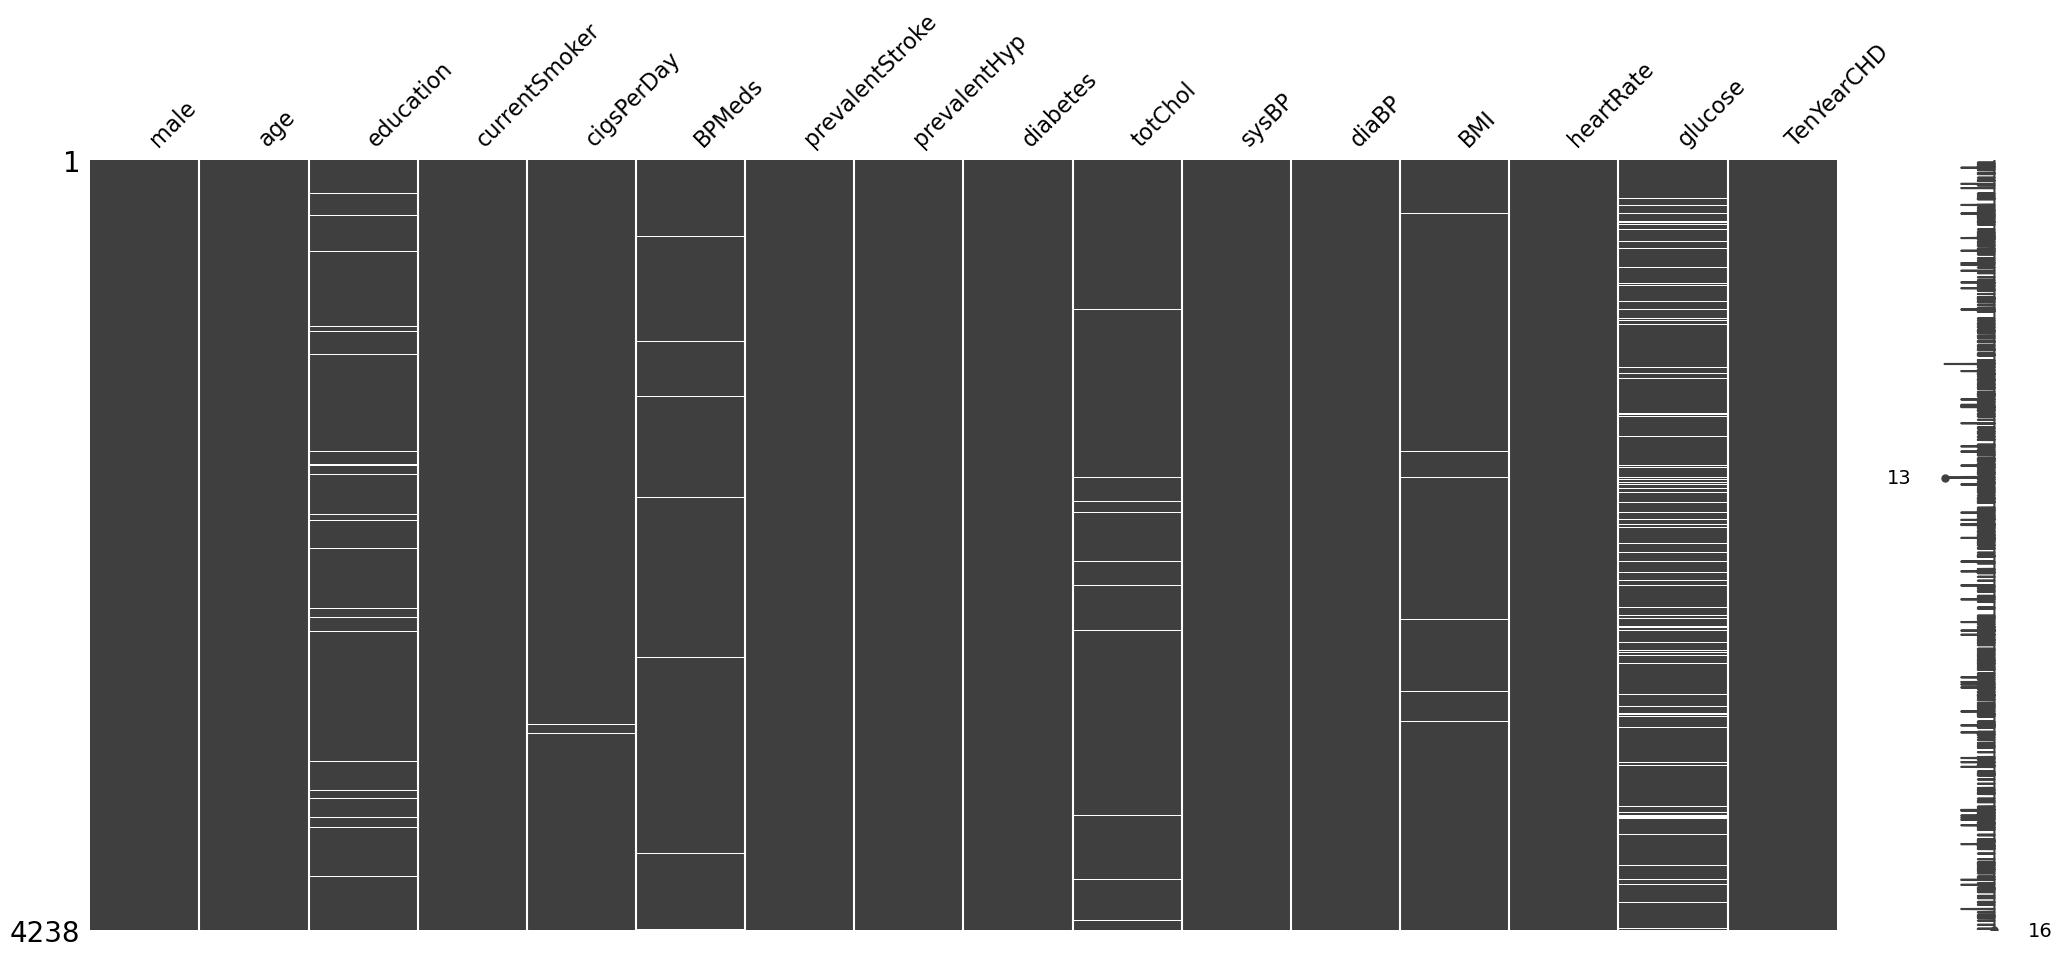

In [16]:
msno.matrix(heart)

In [18]:
pip install pandas numpy seaborn matplotlib scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.


### Correlation Matrix

In [19]:
cor_matrix = heartnew.corr()
print(cor_matrix)

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.024387   0.017677       0.206778    0.331243   
age             -0.024387  1.000000  -0.158961      -0.210862   -0.189099   
education        0.017677 -0.158961   1.000000       0.025253    0.013527   
currentSmoker    0.206778 -0.210862   0.025253       1.000000    0.773819   
cigsPerDay       0.331243 -0.189099   0.013527       0.773819    1.000000   
BPMeds          -0.052128  0.134670  -0.013647      -0.051936   -0.046479   
prevalentStroke -0.002308  0.050864  -0.030353      -0.038159   -0.036283   
prevalentHyp     0.000806  0.306693  -0.079100      -0.107561   -0.069890   
diabetes         0.013833  0.109027  -0.039547      -0.041859   -0.036934   
totChol         -0.070229  0.267764  -0.012956      -0.051119   -0.030222   
sysBP           -0.045484  0.388551  -0.124511      -0.134371   -0.094764   
diaBP            0.051575  0.208880  -0.058502      -0.115748   -0.056650   

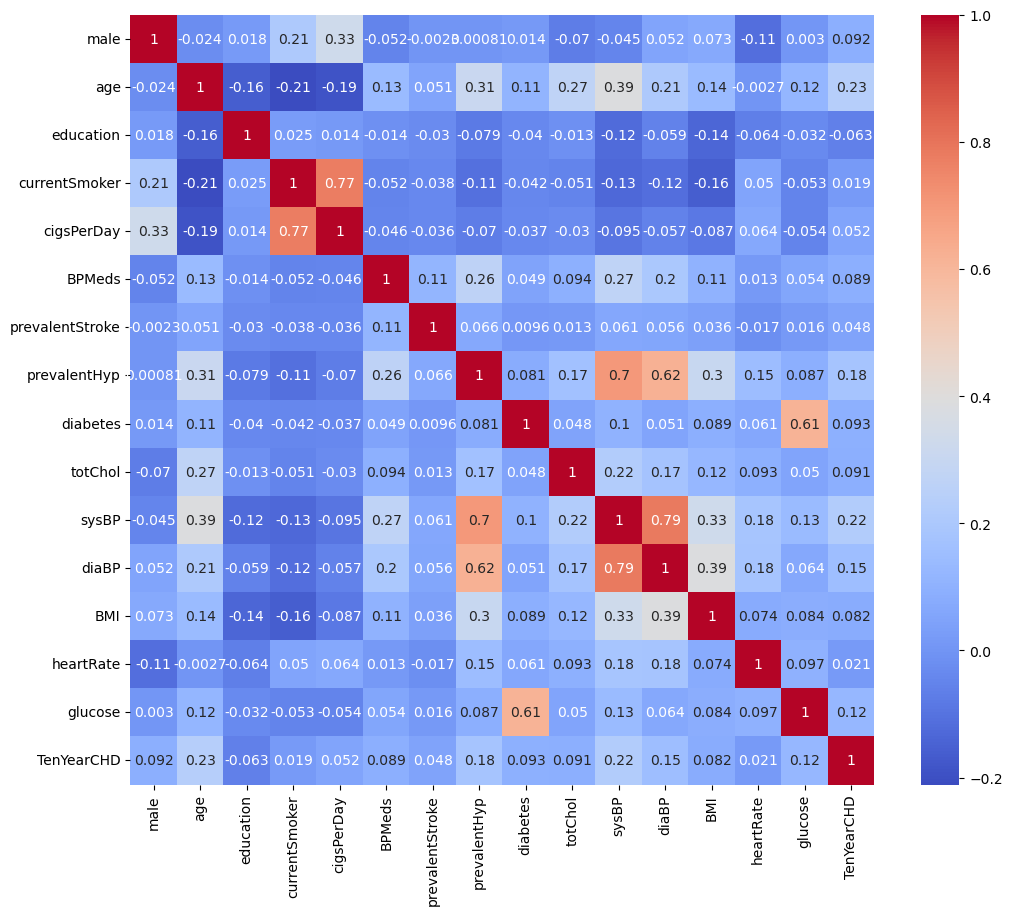

In [20]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.show()

In [28]:
heartnew.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

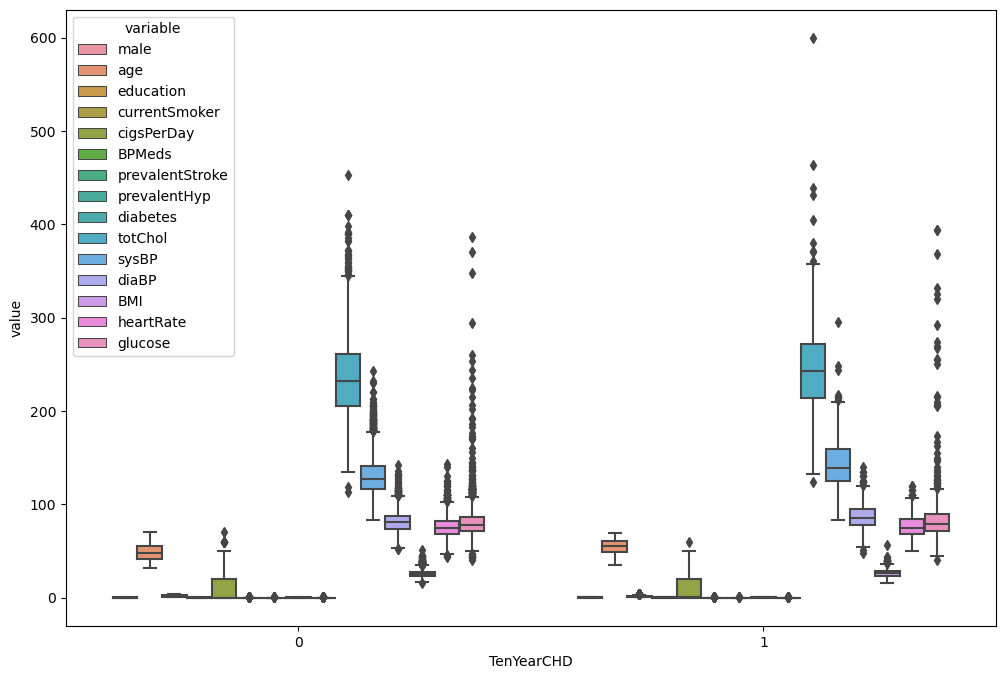

In [30]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='TenYearCHD', y='value', hue='variable', data=pd.melt(heartnew, id_vars='TenYearCHD'))
plt.show()

In [31]:
# Split the data into training and test sets
X = heartnew.drop(columns=['TenYearCHD'])
y = heartnew['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Logistic regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [33]:
# Predict on test data
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

In [34]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[912  11]
 [157  17]]


In [35]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       923
           1       0.61      0.10      0.17       174

    accuracy                           0.85      1097
   macro avg       0.73      0.54      0.54      1097
weighted avg       0.81      0.85      0.80      1097



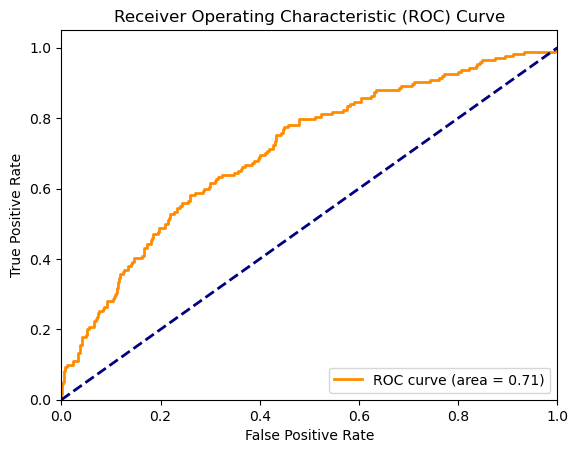

In [36]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
# Logistic regression with statsmodels for detailed analysis
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.366968
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                          Logit   Df Residuals:                     2543
Method:                           MLE   Df Model:                           15
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.1307
Time:                        22:37:44   Log-Likelihood:                -939.07
converged:                       True   LL-Null:                       -1080.2
Covariance Type:            nonrobust   LLR p-value:                 2.591e-51
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7101      0.886     -9.833      0.000     -10.446      -6.974
male          

In [40]:
# Split the data into training and test sets
X = heartnew.drop(columns=['TenYearCHD'])
y = heartnew['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [43]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
predicted_probs = log_reg.predict_proba(X_test)[:, 1]
predicted_class = (predicted_probs >= 0.5).astype(int)

In [45]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_class)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[912   6]
 [164  15]]


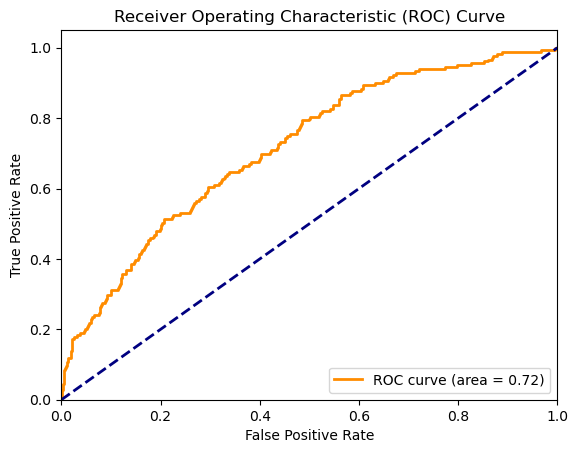

AUC-ROC: 0.7159905551295627


In [46]:
# ROC and AUC
roc_auc = roc_auc_score(y_test, predicted_probs)
fpr, tpr, _ = roc_curve(y_test, predicted_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc}")

In [47]:
# Decision Tree Analysis
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)
dt_predicted_class = decision_tree.predict(X_test)
dt_predicted_probs = decision_tree.predict_proba(X_test)[:, 1]

In [48]:
# Confusion Matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_predicted_class)
print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)

Decision Tree Confusion Matrix:
 [[772 146]
 [144  35]]


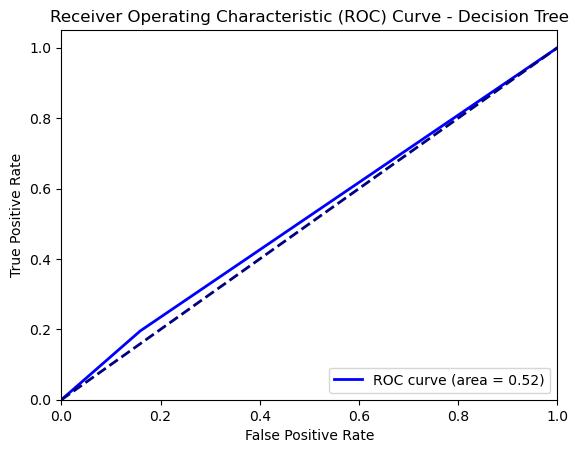

AUC-ROC (Decision Tree): 0.5182446659607356


In [49]:
# ROC and AUC for Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt_predicted_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predicted_probs)
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC (Decision Tree): {dt_roc_auc}")

In [50]:
# Compare the results
print("Logistic Regression vs Decision Tree")
print("Confusion Matrix (Logistic Regression):\n", conf_matrix)
print("Confusion Matrix (Decision Tree):\n", dt_conf_matrix)
print(f"AUC-ROC (Logistic Regression): {roc_auc}")
print(f"AUC-ROC (Decision Tree): {dt_roc_auc}")

Logistic Regression vs Decision Tree
Confusion Matrix (Logistic Regression):
 [[912   6]
 [164  15]]
Confusion Matrix (Decision Tree):
 [[772 146]
 [144  35]]
AUC-ROC (Logistic Regression): 0.7159905551295627
AUC-ROC (Decision Tree): 0.5182446659607356


In [54]:
# Split the data into training and test sets
X = heartnew.drop(columns=['TenYearCHD'])
y = heartnew['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [55]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
predicted_probs_log_reg = log_reg.predict_proba(X_test)[:, 1]
predicted_class_log_reg = (predicted_probs_log_reg >= 0.5).astype(int)

# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, predicted_class_log_reg)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log_reg)

Confusion Matrix (Logistic Regression):
 [[912   6]
 [164  15]]


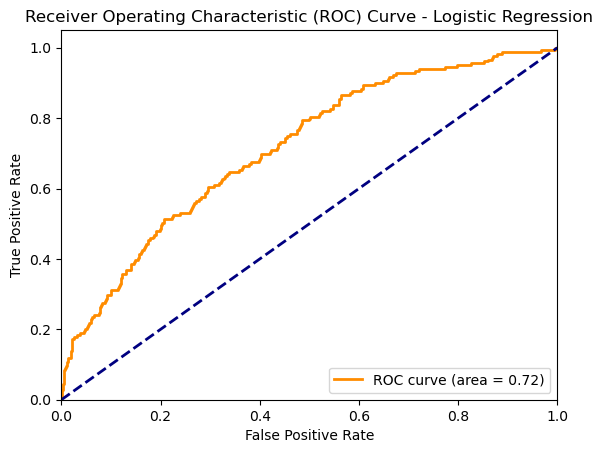

AUC-ROC (Logistic Regression): 0.7159905551295627


In [56]:
# ROC and AUC for Logistic Regression
roc_auc_log_reg = roc_auc_score(y_test, predicted_probs_log_reg)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, predicted_probs_log_reg)
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC (Logistic Regression): {roc_auc_log_reg}")


In [57]:
# Decision Tree Analysis
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)
predicted_probs_tree = decision_tree.predict_proba(X_test)[:, 1]
predicted_class_tree = (predicted_probs_tree >= 0.5).astype(int)

# Confusion Matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, predicted_class_tree)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_tree)


Confusion Matrix (Decision Tree):
 [[772 146]
 [144  35]]


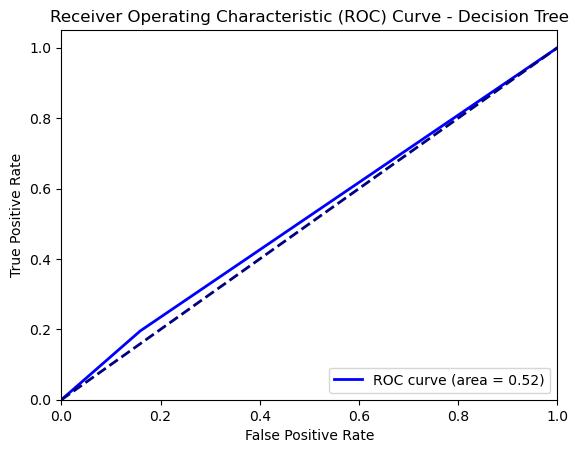

AUC-ROC (Decision Tree): 0.5182446659607356


In [58]:
# ROC and AUC for Decision Tree
roc_auc_tree = roc_auc_score(y_test, predicted_probs_tree)
fpr_tree, tpr_tree, _ = roc_curve(y_test, predicted_probs_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC (Decision Tree): {roc_auc_tree}")


In [59]:

# Compare the results
print("Logistic Regression vs Decision Tree")
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log_reg)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_tree)
print(f"AUC-ROC (Logistic Regression): {roc_auc_log_reg}")
print(f"AUC-ROC (Decision Tree): {roc_auc_tree}")

Logistic Regression vs Decision Tree
Confusion Matrix (Logistic Regression):
 [[912   6]
 [164  15]]
Confusion Matrix (Decision Tree):
 [[772 146]
 [144  35]]
AUC-ROC (Logistic Regression): 0.7159905551295627
AUC-ROC (Decision Tree): 0.5182446659607356
